# Multiprocessing in Python

Multiprocessing allows Python to run CPU-intensive tasks side by side. This is done by launching multiple and independent copies of the Python runtime.

## Advantages
- **True multitasking** by giving each Python process its own CPU core
    - Ideal for CPU-intensive tasks
- **Better resource utilization**
- **Isolation of processes**:
    - Each process runs in its own memory space, reducing the risk of data corruption and making debugging simpler.
- **Simplified resource management**:
    - Compared to threading, multiprocessing in Python is often easier to implement and manage, with fewer concerns about thread safety and synchronization.
- Easier code **implementation** compared to threading
    - No need for thread pools
    - No need for queues
    - No exceptions handling complexities
    - No rate limitations

In other words, a lot less work!

## Disadvantages
- **Additional overhead on the CPU**
    - Creating and managing multiple processes introduces overhead, which can impact overall performance.
- **Memory consumption**: Each subprocess needs to have a copy of the data
    - This increases the resources needed ie each process requires its own memory space
    - Need to pass resources between tasks

# A simple example

In [ ]:
from multiprocessing import Process

def print_square(num):
    print(f'Square: {num * num}')

if __name__ == "__main__":
    p = Process(target=print_square, args=(10,))
    p.start()
    p.join()

## ok maybe that was to simple

In [ ]:
from multiprocessing import Process

def print_square(num):
    print(f'Square of {num}: {num * num}')

if __name__ == "__main__":
    processes = []
    for i in range(1, 11):
        p = Process(target=print_square, args=(i,))
        processes.append(p)
        p.start()

    for p in processes: #wait for everything to finish
        p.join()

Notice that it looks very similar to threading.

# The old way - Forking - Linux, macOS, Unix

**PID (Process Identifier)**: A number used by kernel-based OS to uniquely identify an active process.

On POSIX-compliant systems (such as Linux, macOS, and Unix), the fork system call is used to create a new process. When a process forks, it creates a child process that is an exact copy of the parent process. Both processes then continue executing independently from the point where the fork occurred.

In Python, the os.fork() function allows you to create a child process. After forking, the parent and child processes have separate memory spaces, enabling parallel execution without interference.

os.fork() may not work in windows so it is recommended to use WSL2

In [ ]:
import os  # OS manages the CPU tasks

pid_list = []  # List to store the CPU PIDs

tmp = 1  # Setup a variable to track the PID
pid_list.append(os.getpid())
child_pid = os.fork()  # Create 1 fork

if child_pid == 0:
    pid_list.append(os.getpid())
    print("CHLD: TMP value is: %d " % tmp)
    print("CHLD: pids are %s" % pid_list)
else:
    pid_list.append(os.getpid())
    tmp += 1
    print()
    print("PRNT: Child pid: %d" % child_pid)
    print("PRNT: pids are %s" % pid_list)
    print("PRNT: TMP value is: %d " % tmp)

## Forking Example Compatible with Windows and Linux

Since `os.fork()` is not available on Windows, we can use the `multiprocessing` module to achieve similar functionality:

In [ ]:
from multiprocessing import Process, current_process
import os

def child_process():
    print(f"CHLD: PID is {os.getpid()}, Parent PID is {os.getppid()}")

if __name__ == "__main__":
    print(f"PRNT: PID is {os.getpid()}")
    child = Process(target=child_process)
    child.start()
    child.join()



### Notes:
- The `os.fork()` function is specific to Unix-like systems (Linux, macOS). For cross-platform compatibility, we use the `multiprocessing` module.
- Ensure you run this code in a terminal or an IDE that supports multiprocessing, as some environments like Jupyter Notebooks may not handle multiprocessing well.

## Another Example

Here's an example showing how to create new processes with the `multiprocessing` module:

In [ ]:
from multiprocessing import Process
import os

def work(identifier):
    print('Process {}, pid: {}'.format(identifier, os.getpid()))

if __name__ == "__main__":
    processes = [Process(target=work, args=(number,)) for number in range(5)]
    for process in processes:# Start all the processes 
        process.start()

    for process in processes:# wait for them all to be done
        process.join()


## Large Caclulation to show CPU Utilization
ON windows open up you command prompt and click CPU

On Macos open Activity Monitor, navigate to the "CPU" tab

On Linux systems type mpstat -P ALL 1 100


In [ ]:
import multiprocessing
import time

def large_calculation(num):
    result = 0
    for i in range(1, 10000000):
        result += i * num
    print(f'Large calculation result for {num}: {result}')

if __name__ == "__main__":
    start_time = time.time()

    processes = []
    for i in range(1, 11):
        p = multiprocessing.Process(target=large_calculation, args=(i,))
        processes.append(p)
        p.start()

    for p in processes:
        p.join()

    end_time = time.time()
    print(f"Total execution time: {end_time - start_time} seconds")

In [ ]:
#the old way for fun
import time

def large_calculation(num):
    result = 0
    for i in range(1, 10000000):
        result += i * num
    print(f'Large calculation result for {num}: {result}')

if __name__ == "__main__":
    start_time = time.time()

    for i in range(1, 11):
        large_calculation(i)

    end_time = time.time()
    print(f"Total execution time: {end_time - start_time} seconds")

## Pools

In [ ]:
from multiprocessing import Pool

def square(num):
    return num * num

if __name__ == "__main__":
    with Pool(4) as p:
        result = p.map(square, [1, 2, 3, 4, 5])
        print(result)


In [ ]:
from multiprocessing import Pool
import time

def large_calculation(num):
    result = 0
    for i in range(1, 10000000):
        result += i * num
    print(f'Large calculation result for {num}: {result}')

if __name__ == "__main__":
    start_time = time.time()

    with Pool(4) as p:
        p.map(large_calculation, range(1, 11))

    end_time = time.time()
    print(f"Total execution time: {end_time - start_time} seconds")

## Communication Between Processes



### Using `multiprocessing.Value` to communicate between processes:

Value is used for sharing simple things like int and doubles


In [ ]:
from multiprocessing import Value, Process

def increment(shared_num):
    shared_num.value += 1

if __name__ == "__main__":
    shared_num = Value('i', 0) #i for int
    processes = [Process(target=increment, args=(shared_num,)) 
                for _ in range(10)] #group them all

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_num.value)

<AxesSubplot: xlabel='fare', ylabel='Density'>

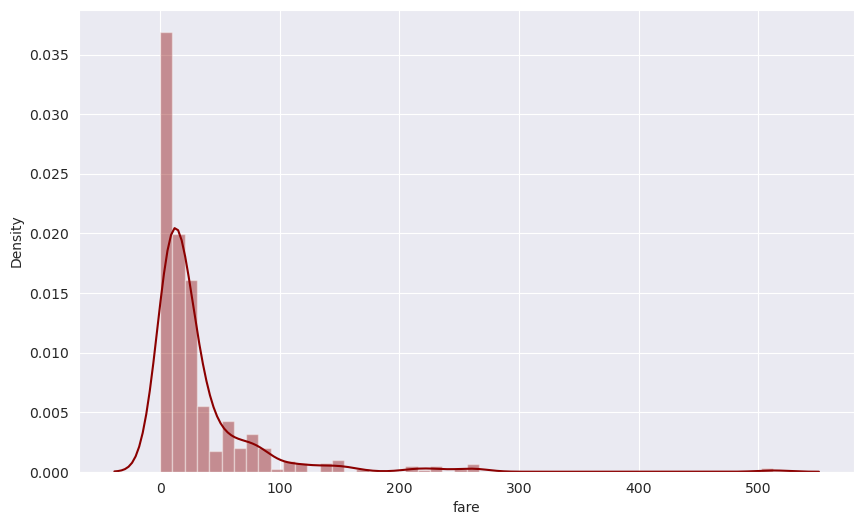

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

#### The important lock

In [ ]:
from multiprocessing import Value, Process

def sum_of_squares(shared_sum, start, end):
    for i in range(start, end):
        shared_sum.value += i * i

if __name__ == "__main__":
    shared_sum = Value('i', 0)  # 'i' for int
    num_processes = 4
    range_per_process = 100 // num_processes

    processes = [
        Process(target=sum_of_squares, 
                args=(shared_sum, i * range_per_process, (i + 1) * range_per_process))
            for i in range(num_processes)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_sum.value)

In [ ]:
from multiprocessing import Process, Value, Lock

def sum_of_squares(start, end, shared_result, lock):
    for i in range(start, end):
        with lock:
            shared_result.value += i*i

if __name__ == "__main__":
    num_processes = 4
    range_per_process = 100 // num_processes
    shared_result = Value('i', 0) 
    lock = Lock()

    processes = [
        Process(target=sum_of_squares, args=(i * range_per_process + 1, (i + 1) * range_per_process + 1, shared_result, lock))
        for i in range(num_processes)
    ]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_result.value)

    Ok so whats the big deal there the same?

In [ ]:
from multiprocessing import Process, Value

def factorial_part(start, end, shared_result):
    result = 1
    for i in range(start, end):
        result *= i
        shared_result.value *= result

if __name__ == "__main__":
    num_processes = 4
    n = 100  # Large number for factorial calculation
    range_per_process = n // num_processes
    shared_result = Value('d', 1.0)  # 'd' for double to handle large numbers

    processes = [
        Process(
            target=factorial_part, 
            args=(i * range_per_process + 1, (i + 1) * range_per_process + 1, shared_result))
            for i in range(num_processes)
    ]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_result.value)

In [ ]:
from multiprocessing import Process, Value, Lock

def factorial_part(start, end, shared_result, lock):
    result = 1
    for i in range(start, end):
        result *= i
    with lock:
        shared_result.value *= result

if __name__ == "__main__":
    num_processes = 4
    n = 100  # Large number for factorial calculation
    range_per_process = n // num_processes
    shared_result = Value('d', 1.0)  # 'd' for double to handle large numbers
    lock = Lock()

    processes = [
        Process(
            target=factorial_part, 
            args=(i * range_per_process + 1, (i + 1) * range_per_process + 1, shared_result, lock))
            for i in range(num_processes)
    ]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_result.value)

### Using 'Multiprocessing.Manager' to communicate 

Value is only useful for simple things tasks Manager is used for  sharing lists or dictionaries between processes

#### Lists

In [ ]:
from multiprocessing import Process, Manager

def append_to_list(shared_list):
    for i in range(5):
        shared_list.append(i)

if __name__ == "__main__":
    manager = Manager()
    shared_list = manager.list()

    processes = [
        Process(target=append_to_list, args=(shared_list,)) 
        for _ in range(4)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_list)

#### Dictionaries 

In [ ]:
from multiprocessing import Process, Manager

def update_dict(shared_dict):
    for i in range(5):
        shared_dict[i] = i * i

if __name__ == "__main__":
    manager = Manager()
    shared_dict = manager.dict()

    processes = [Process(target=update_dict, args=(shared_dict,)) 
                for _ in range(4)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print(shared_dict)

#### Dictionary with a lock

In [ ]:
from multiprocessing import Process, Manager, Lock

def update_dict(shared_dict, lock, key, value):
    with lock:
        shared_dict[key] = value

if __name__ == "__main__":
    manager = Manager()
    shared_dict = manager.dict()
    lock = Lock()

    processes = [
        Process(target=update_dict, args=(shared_dict, lock, f'{i}', i * i))
        for i in range(5)
    ]

    for p in processes: 
        p.start()
    for p in processes:
        p.join()

    print(shared_dict)  

### Using `multiprocessing.Pipe` to communicate between processes

- Pipe allows for 
    - Bidirectional Communication: You need two-way communication between processes. Pipe allows both ends to send and receive messages.
    - Complex Data: You need to send complex data structures (e.g., lists, dictionaries, objects) between processes. Pipe can handle these types of data.

In [ ]:
from multiprocessing import Process, Pipe

def send_message(conn):
    conn.send("Hello from the child process!")
    conn.close()

if __name__ == "__main__":
    parent_conn, child_conn = Pipe()

    child = Process(target=send_message, args=(child_conn,))
    child.start()
    child.join()

    message = parent_conn.recv()
    print(message)

### Passing Int, String, Dict, Classes and anything else 

In [ ]:
from multiprocessing import Process, Pipe

class PassClass:
    pass

def work(connection):
    while True:
        instance = connection.recv()
        if instance:
            print("CHLD: recv: {}".format(instance))
        else:
            return

    
if __name__ == "__main__":
    parent_conn, child_conn = Pipe() #Connection between parent and child
    child = Process(target=work, args=(child_conn,))

    for item in (42, 'some string', {'one': 1}, PassClass(), True):
        print("PRNT: send: {}".format(item))
        parent_conn.send(item)
    parent_conn.close()

    child.start()
    child.join()



### Passing back data through the pipe

In [ ]:
from multiprocessing import Process, Pipe

class StudentClass():
    def __init__(self):
        self.passing = False
    def isPassing(self):
        return self.passing
    


def work(connection):
        instance = connection.recv()
        instance.passing = True
        print("CILD: {}".format(instance.isPassing()))

if __name__ == "__main__":
    parent_conn, child_conn = Pipe() #Connection between parent and child
    child = Process(target=work, args=(child_conn,))

    item = StudentClass()
    print("PRNT: {}".format(item.isPassing()))
    parent_conn.send(item)

    child.start()
    print("PRNT: {}".format(item.isPassing()))
    child.join()


    Why is PRNT False. Do you see what we did wrong?

In [ ]:
from multiprocessing import Process, Pipe

class StudentClass():
    def __init__(self):
        self.passing = False
    def isPassing(self):
        return self.passing

def work(connection):
    instance = connection.recv()
    instance.passing = True
    connection.send(instance)  # Send the updated instance back to the parent
    print("CHILD: {}".format(instance.isPassing()))

if __name__ == "__main__":
    parent_conn, child_conn = Pipe()  # Connection between parent and child
    child = Process(target=work, args=(child_conn,))

    item = StudentClass()
    print("PARENT: {}".format(item.isPassing()))
    parent_conn.send(item)

    child.start()
    updated_item = parent_conn.recv()  # Receive the updated instance
    print("PARENT: {}".format(updated_item.isPassing()))
    child.join()

#### AND A LITTLE BIT MORE

Does your mind hurt yet.

In [ ]:
from multiprocessing import Process, Pipe

def factorial_part(start, end, conn):
    """Calculate the factorial for a segment of the range"""
    result = 1
    for i in range(start, end):
        result *= i
    # Send the result through the Pipe
    conn.send(result)
    conn.close()


if __name__ == "__main__":
    NUM_OF_PROCESSES = 4
    num_to_factor = 100
    range_per_process = num_to_factor // NUM_OF_PROCESSES

    # Create Pipes for communication between parent and child processes
    parent_conns, child_conns = zip(*[Pipe() for _ in range(NUM_OF_PROCESSES)]) #using zip to order them all

    processes = [
        Process(target=factorial_part, args=(i * range_per_process + 1, (i + 1) * range_per_process + 1, child_conns[i]))
        for i in range(NUM_OF_PROCESSES)
    ]


    for p in processes:
        p.start()
    for p in processes:
        p.join()

    factorial_result = 1
    for conn in parent_conns:
        factorial_result *= conn.recv()

    print(f"{factorial_result:.15e}")       


#### A small brake

``` python
"""Brake down of above"""
# Create Pipes for communication between parent and child processes
parent_conns, child_conns = zip(*[Pipe() for _ in range(NUM_OF_PROCESSES)]) #using zip to order them all

pipes = [Pipe() for _ in range(NUM_OF_PROCESSES)]
# # pipes = [(parent_conn1, child_conn1), (parent_conn2, child_conn2), (parent_conn3, child_conn3), (parent_conn4, child_conn4)]

parent_conns, child_conns = zip(*pipes)
#The * operator is used for unpacking
# parent_conns = (parent_conn1, parent_conn2, parent_conn3, parent_conn4)
# # child_conns = (child_conn1, child_conn2, child_conn3, child_conn4)
```

In [ ]:
original_list = [('a', 1), ('b', 2), ('c', 3)]
# Unpacking the list
print(original_list)
print(list(zip(*original_list))) # Results in ('a', 'b', 'c'), (1, 2, 3)

Using fetch_rates and Manager

In [ ]:
from multiprocessing import Process, Manager
import requests
import os
import time

def fetch_rate(bases, symbols=['eur', 'jpy', 'usd'], timing=False, shared_dict=None):
    """
    A function to fetch the conversion rate of a given input.Takes in the desired base currency and outputs 
    the given conversion rate to supplied symbols.
    """
    # Setup time for demonstration
    if timing:
        a = time.time()        

    # Run the main part of the function to get the rates
    web = "http://www.floatrates.com/daily/" + str(bases) + ".json"
    response = requests.get(web)
    rate = response.json()
    rate[bases] = {'rate': 1}

    # Update the shared dictionary with the rates
    shared_dict[bases] = {symbol: rate[symbol]['rate'] for symbol in symbols}

    if timing:
        print("Completed pid: " + str(os.getpid()))
        print("Time Elapsed on CPU:  {:.02f}s\n".format((time.time() - a)))



def multicore(debug=False):
    manager = Manager()
    shared_dict = manager.dict()
    bases = ['usd', 'eur', 'jpy']  # Example base currencies

    processes = [
        Process(target=fetch_rate, args=(base, ['eur', 'jpy', 'usd'], debug, shared_dict))
        for base in bases
    ]

    a = time.time()
    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print("Total Time with processes Elapsed:  {:.02f}s".format(time.time() - a))
    print("Shared Dictionary:", shared_dict)

if __name__ == "__main__":
    # Run the multicore function
    multicore(True)


In [ ]:


#multiprocessing
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def multiproc_primes_3min():
    time_start = time.time()
    multiproc_num = 0
    while time.time() - time_start < 180:
        if is_prime(multiproc_num):
            highest_prime = multiproc_num
        multiproc_num += 1
    print(highest_prime)


multiproc_primes_3min()




def find_highest_prime_multiprocessing():
    with Pool() as pool:
        start_time = time.time()
        highest_prime = 0
        num = 2
        chunk_size = 10000

        while time.time() - start_time < 180:
            ranges = [(start, start + chunk_size) for start in range(num, num + chunk_size * pool._processes, chunk_size)]
            results = pool.map(check_range, ranges)
            highest_prime = max(highest_prime, *results)
            num += chunk_size * pool._processes
    return highest_prime
     


In [ ]:
# https://docs.python.org/3/library/multiprocessing.html - multiprocessing man page

import time
from multiprocessing import Process, Queue, current_process, freeze_support, Manager, Lock

# given function
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def worker(input_q, highest_prime, lock, end_time):
  """Worker process to test numbers and update highest prime."""
  local_highest = 0
  while time.time() < end_time:  # Time-based stop condition
    try:
      num = input_q.get(timeout=0.01)  # Add timeout to avoid blocking
      if num is None:  # Termination signal
        break
      if is_prime(num):
        local_highest = max(local_highest, num)
        with lock:
          highest_prime.value = max(highest_prime.value, local_highest)
    except Queue.Empty:  # Handle timeout
      pass

def main(num_processes, run_time):
  """Main function to manage processes and calculate execution time."""
  manager = Manager()
  input_q = Queue()
  highest_prime = manager.Value('i', 0)
  lock = Lock()

  processes = []
  end_time = time.time() + run_time  # Calculate end time
  for _ in range(num_processes):
    p = Process(target=worker, args=(input_q, highest_prime, lock, end_time))
    processes.append(p)
    p.start()

  start_time = time.time()
  num = 0
  while time.time() < end_time:  # Time-based loop
    input_q.put(num)
    num += 1

  # Send termination signals (optional, workers will stop due to time condition) - chatgpted
  for _ in range(num_processes):
    input_q.put(None)

  for p in processes:
    p.join()

  end_time = time.time()  # Update end time for accurate calculation

  print(f"Highest prime found: {highest_prime.value}")
  print(f"Time taken: {end_time - start_time:.2f} seconds")

if __name__ == '__main__':
  freeze_support() # found in some multiprocessing examples 
  num_processes = 4  # Adjust the number of processes
  run_time = 3 * 6   # Adjust the run time in seconds
  main(num_processes, run_time)

In [5]:
# https://docs.python.org/3/library/multiprocessing.html - multiprocessing man page

import time
from multiprocessing import Process, Queue, current_process, freeze_support, Manager, Lock

# given function
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def worker(highest_prime, lock, end_time):
  """Worker process to test numbers and update highest prime."""
  local_highest = highest_prime.value
  while time.time() < end_time:  # Time-based stop condition
    if is_prime(local_highest):
        local_highest = max(local_highest,highest_prime.value)
    with lock:
        highest_prime.value = max(highest_prime.value, local_highest)

def main(num_processes, run_time):
  """Main function to manage processes and calculate execution time."""
  manager = Manager()
  highest_prime = manager.Value('i', 0)
  lock = Lock()

  processes = []
  end_time = time.time() + run_time  # Calculate end time
  for _ in range(num_processes):
    p = Process(target=worker, args=( highest_prime, lock, end_time))
    processes.append(p)
    p.start()
  p.join()

  print(f"Highest prime found: {highest_prime.value}")

if __name__ == '__main__':
  freeze_support() # found in some multiprocessing examples 
  num_processes = 2  # Adjust the number of processes
  run_time = 3 * 6  # Adjust the run time in seconds
  main(num_processes, run_time)

Highest prime found: 0
